In [1]:
import json
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import pickle

In [2]:
def load_pickle(file):
    # open a file, where you stored the pickled data
    file = open(file, 'rb')

    # dump information to that file
    data = pickle.load(file)

    # close the file
    file.close()
    
    return data


In [3]:
train_set = load_pickle('./Data dictionaries/train_set.pickle')

In [4]:
test_set = load_pickle('./Data dictionaries/test_set.pickle')
validation_set = load_pickle('./Data dictionaries/validation_set.pickle')

In [5]:
user_id_mapping = load_pickle('./Data dictionaries/user_id.pickle')
business_id_mapping = load_pickle('./Data dictionaries/item_id.pickle')
city_id_mapping = load_pickle('./Data dictionaries/city_id.pickle')

In [16]:
count=0
for d in user_friends_mapping.items():
    if count>1:
        break
    print(d)
    count+=1

('q_QQ5kBBwlCcbL1s4NVK3g', ['xBDpTUbai0DXrvxCe3X16Q', ' 7GPNBO496aecrjJfW6UWtg', ' gUfHciSP7BbxZd5gj-c4xw', ' NXw0bCLF5ZtFMfhcj7CFSw', ' OGjmMxPuIoLTJ3O-CO2A4g', ' mwUcJP11UkIjCB8jBAaS3g', ' fDmgb3Vi3-f_MtFOImH0Ug', ' -x1516ZG5GllZiBjDQlRkA', ' tx5UcfGrsud-CQdq8p8KKw', ' HKooPGsHiZV_0vTn45fG_w', ' 2iSBJHVMNsolJ3AH1g_D7A', ' NcoP47QP_eMVtoZvinwU-w', ' XPOx-mCubVGQ1rRknztFtw', ' K6Tbv3a_qUQK0ed4T0_u5Q', ' _dUWTJf0faMXMdr_RFW5Xw', ' 5ni2bacPC7scIAHAb9DmlQ', ' cG-UHRz9QdhBEBz3R_8X0Q', ' BPh-OMqPul6HXsnCHxsk6g', ' mgzNtI5XOuPwwukp6yh1Vw', ' pMbWlP0cAvtRSFMI-8mvaw', ' yf-DODoyVwAh3OQYaRIzzg', ' nnImk681KaRqUVHlSfZjGQ', ' AH3SMQ4HwttTUvqvkieMxA', ' RZwjMDvgVUi3yJdJofziJQ', ' 8Zocr6jVED5JQEBvqwEBZw', ' 02r6AiM9aNUpHeCoWsOxYA', ' pkJvKUjA68vnDFhJh1gHEg', ' cPqZKGcKhioqRZeokvV0cQ', ' LX4BsaXflALTvTDnft_6FA', ' dw2T8SFAU3f1MjN-zOaS7w', ' BUB_t_Rvzs1yPEzZipkWjw', ' 9p9-1hlmpNl6otWYujJDYw', ' Z0C_AdA4vJwzrg1Fe4yddg', ' YoLuCwckCU7nrH807XWCQw', ' RKT1rPAoiLJgXcEflvJ95Q', ' 71-vm7Jzxat9t42mX1IaKw', '

In [209]:
count=0
for d in train_set:
    if count>1:
        break
    if d[1]==59:
        print(len(train_set[d][1]+train_set[d][0]))
        #count+=1

103
103
103


Reversing the dicts

In [169]:
user_id_mapping_r = {value : key for (key, value) in user_id_mapping.items()}
business_id_mapping_r = {value : key for (key, value) in business_id_mapping.items()}
city_id_mapping_r = {value : key for (key, value) in city_id_mapping.items()}

In [104]:
user_id_mapping['_Y7XYBvOrq6F7PL14sxkKg']

0

In [200]:
len(train_set)

9409

## Popularity based recommendation

**Recommendation based on popular restaurants in each city**

Get all restaurants in city and calculate popularity by number of visits

In [130]:
city_restaurants_map = defaultdict(set)
city_popular_map = defaultdict(dict)

In [131]:
for d in train_set:
    # {city : set(visited+non visited)}
    city_restaurants_map[d[1]].update(train_set[d][0]+train_set[d][1])
    for visited in train_set[d][0]:
        if visited not in city_popular_map[d[1]]:
            # {city : {business : count}}
            city_popular_map[d[1]][visited] = 1
        else:
            city_popular_map[d[1]][visited] += 1

Getting most popular in each city

In [136]:
numberOfRecommendations = 1
# {city : most popular business}
city_most_popular = defaultdict(int)
for city in city_popular_map:
    mostPopular = [(city_popular_map[city][x], x) for x in city_popular_map[city]]
    mostPopular.sort(reverse = True)
    city_most_popular[city] = mostPopular[0][1]

On validation and test set, check if popular in visited, calculate accuracy

In [151]:
def getPopularityAccuracy(test):
    correct = 0
    for d in test:
        recommendation = city_most_popular[d[1]]
        if recommendation in test[d][1]:
            correct+=1
    return correct/len(test)

In [152]:
getPopularityAccuracy(test_set)

0.06451270060580296

In [153]:
getPopularityAccuracy(validation_set)

0.06727601232862153

Top 5 most popular recommendations

In [158]:
numberOfRecommendations = 5
# {city : most popular business}
city_most_popular = defaultdict(list)
for city in city_popular_map:
    mostPopular = [(city_popular_map[city][x], x) for x in city_popular_map[city]]
    mostPopular.sort(reverse = True)
    recommendations = []
    for _, i in mostPopular:
        if len(recommendations)>=numberOfRecommendations:
            break
        recommendations.append(i)

    city_most_popular[city] = recommendations

In [160]:
def getPopularityRecommendationsAccuracy(test):
    correct = 0
    for d in test:
        recommendations = city_most_popular[d[1]]
        for r in recommendations:
            if r in test[d][1]:
                correct+=1
                break
    return correct/len(test)

In [161]:
getPopularityRecommendationsAccuracy(test_set)

0.30768413221383784

In [162]:
getPopularityRecommendationsAccuracy(validation_set)

0.3091720692953555

Accuracy by precision@5. : No. of top 5 in visited

In [164]:
def getPopularityAccuracyAt5(test):
    precisionSum = 0
    for d in test:
        recommendations = city_most_popular[d[1]]
        precision = 0
        for r in recommendations:
            if r in test[d][1]:
                precision+=1
        precision /= len(recommendations)
        precisionSum+=precision
    return precisionSum/len(test)

In [165]:
getPopularityAccuracyAt5(test_set)

0.07176107981719708

In [166]:
getPopularityAccuracyAt5(validation_set)

0.07167605484111013

## Rating Based Recommendation

**Recommendation based on highly reviewed and rated restaurants in each city**

Using the business average rating

In [6]:
def parseData(file):
    for l in open(file):
        yield eval(l)

In [7]:
null = None

In [177]:
# {business_created_id : [review_count , stars]}
business_rating_map = defaultdict(list)
f = './yelp_dataset/yelp_academic_dataset_business.json'
for l in tqdm(parseData(f)):
    if l!=null and l['business_id'] in business_id_mapping:
        business_rating_map[business_id_mapping[l['business_id']]] = [l['review_count'],l['stars']]

len(business_rating_map)

160585it [00:19, 8100.91it/s] 


90932

Top 5 most rated and reviewed

In [180]:
city_rated_map = defaultdict(dict)
for city in city_restaurants_map:
    for business in city_restaurants_map[city]:
        city_rated_map[city][business] = business_rating_map[business]

In [186]:
numberOfRecommendations = 5
# {city : most reviewed rated business}
city_most_rated = defaultdict(list)
for city in city_rated_map:
    mostRated = [(city_rated_map[city][x], x) for x in city_rated_map[city]]
    mostRated.sort(reverse = True)
    recommendations = []
    for _, i in mostRated:
        if len(recommendations)>=numberOfRecommendations:
            break
        recommendations.append(i)
    city_most_rated[city] = recommendations


In [189]:
def getRatingRecoAccuracyAt5(test):
    precisionSum = 0
    for d in test:
        recommendations = city_most_rated[d[1]]
        precision = 0
        for r in recommendations:
            if r in test[d][1]:
                precision+=1
        precision /= len(recommendations)
        precisionSum+=precision
    return precisionSum/len(test)

In [190]:
getRatingRecoAccuracyAt5(test_set)

0.07594855988946901

In [191]:
getRatingRecoAccuracyAt5(validation_set)

0.07599107237751225

## Similarity Based Recommendation

Recommendation on similarilty between users and businesses

In [197]:
def Jaccard(s1, s2):
    numerator = len(s1.intersection(s2))
    denomator = len(s1.union(s2))
    if denomator == 0:
        return 0
    return numerator / denomator

In [217]:
ratingDict_u_i = {} #data of user item rating only
f = './yelp_dataset/yelp_academic_dataset_review.json'
for l in tqdm(parseData(f)):
    if l!=null:
        if (l['user_id'],l['business_id']) not in ratingDict_u_i:
            ratingDict_u_i[(l['user_id'],l['business_id'])] = l['stars']
        else:
            #take best rating
            if ratingDict_u_i[(l['user_id'],l['business_id'])] < l['stars']:
                ratingDict_u_i[(l['user_id'],l['business_id'])] = l['stars']
print(len(ratingDict_u_i))

8635403it [03:30, 41095.97it/s]

8345614


In [275]:
def mostSimilar(u, N, usersPerItem, itemsPerUser):
    similaritiesUsers = []
    items = itemsPerUser[u]
    candidateUsers = set()
    for i in items:
        candidateUsers = candidateUsers.union(usersPerItem[i])
    for u2 in candidateUsers:
        if u2 == u: continue
        sim = Jaccard(items, itemsPerUser[u2])
        similaritiesUsers.append((sim,u2))
    #Sort items by name
    similaritiesUsers.sort(key = lambda x:x[1])
    #Sorting by similarity in reverse
    similaritiesUsers.sort(reverse=True, key = lambda x:x[0])
    similarities=[]
    #getting the most favourite items of similar users
    for s,u2 in similaritiesUsers:
        #ratingDict_u_i = highestRatedItems(u2)
        maxRating = -1
        favItem = None
        for i in itemsPerUser[u2]:
            if (u2,i) in ratingDict_u_i and maxRating < ratingDict_u_i[(u2,i)]:
                maxRating = ratingDict_u_i[(u2,i)]
                favItem = i
            elif favItem is None:
                favItem = i
                
        if favItem is not None:
            similarities.append(favItem)
        if len(similarities)>N:
            break
    return similarities[:N]

In [234]:
numberOfRecommendations = 5
city_most_similar = defaultdict(list)
businessPerUserPerCity = defaultdict(dict)
usersPerBusinessPerCity = defaultdict(dict)

In [236]:
for city in tqdm(city_restaurants_map):
    businessPerUser = defaultdict(set) # Maps users to business they have visited
    usersPerBusiness = defaultdict(set) # Maps business to the users that have visited
    for d in train_set:
        if d[1]==city:
            for business in train_set[d][0]:
                businessPerUser[d[0]].add(business)
                usersPerBusiness[business].add(d[0])
    businessPerUserPerCity[city] = businessPerUser
    usersPerBusinessPerCity[city] = usersPerBusiness

100%|██████████| 55/55 [00:00<00:00, 96.70it/s]


In [276]:
def getSimilarityRecoAccuracyAt5(test_set):
    precisionSum = 0
    recommendations = []
    ideal_cities = set()
    for city in city_restaurants_map:
        for d in test_set:
            if d[1]==city:
                recommendations = mostSimilar(d[0],numberOfRecommendations, businessPerUserPerCity[city], usersPerBusinessPerCity[city])
                precision = 0
                if len(recommendations)==0:
                    recommendations = city_most_popular[d[1]]
                    ideal_cities.add(d[1])
                for r in recommendations:
                    if r in test_set[d][1]:
                        precision+=1
                precision /= len(recommendations)
                precisionSum+=precision
    return precisionSum/len(test_set)

In [249]:
getSimilarityRecoAccuracyAt5(test_set)

0.06595812519927735

In [277]:
getSimilarityRecoAccuracyAt5(validation_set)

0.06457646933786788

## City restaurant EDA

In [279]:
city_restaurant_graph = defaultdict(int)
for city in city_restaurants_map:
    city_restaurant_graph[city_id_mapping_r[city]] = len(city_restaurants_map[city])

In [281]:
import matplotlib.pyplot as plt

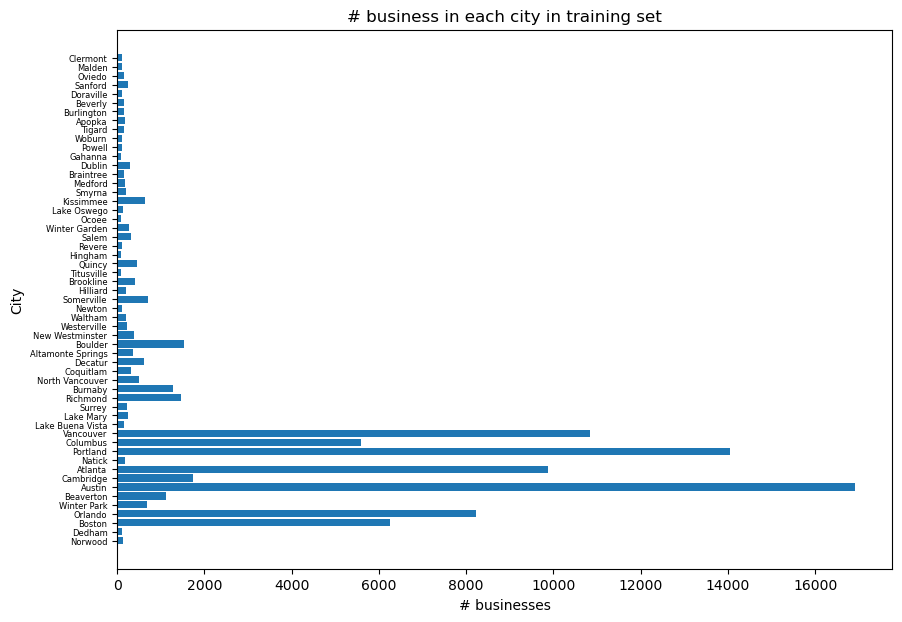

In [320]:
plt.figure(figsize = (10, 7))
plt.title("# business in each city in training set")
plt.barh(list(city_restaurant_graph.keys()), city_restaurant_graph.values())
plt.yticks(fontsize=6)#, rotation=45)
plt.xlabel('# businesses', fontsize=10)
plt.ylabel('City', fontsize=10)

plt.show()

In [321]:
import pandas as pd

In [369]:
city_restaurant_graph_pd = pd.DataFrame.from_dict(city_restaurant_graph.items())
city_restaurant_graph_pd.columns = ['City', '# Businesses']

In [370]:
city_restaurant_graph_pd.head()

,City,# Businesses
0,Norwood,130
1,Dedham,102
2,Boston,6250
3,Orlando,8233
4,Winter Park,674


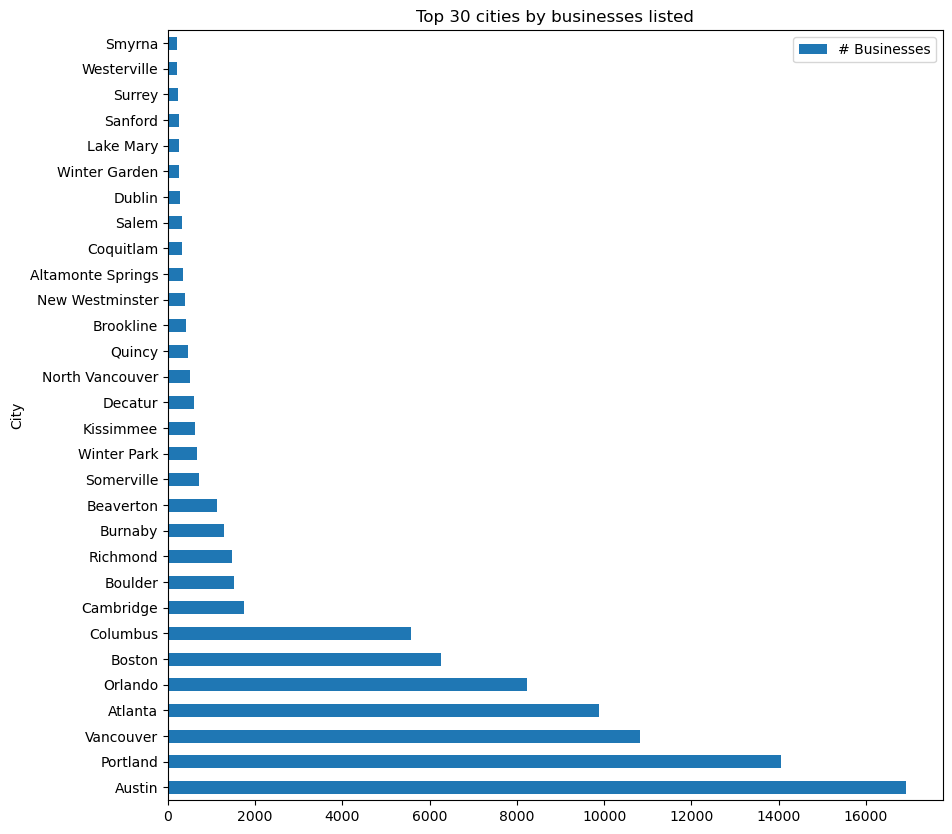

In [379]:
city_restaurant_graph_pd = city_restaurant_graph_pd.sort_values(ascending=False, by = '# Businesses')
city_restaurant_graph_pd[:30].plot(kind='barh', x='City',y='# Businesses', stacked=False, figsize=[10,10])
plt.title('Top 30 cities by businesses listed')
plt.show()

In [337]:
len(city_restaurants_map[city_id_mapping['Austin']])

16916

In [341]:
business_name_mapping = defaultdict(str)
f = './yelp_dataset/yelp_academic_dataset_business.json'
for l in tqdm(parseData(f)):
    if l!=null:
        if l['city']=='Austin' and l['business_id'] in business_id_mapping:
            business_name_mapping[business_id_mapping[l['business_id']]] = l['name']

160585it [00:07, 21149.79it/s]


In [345]:
business_name_review_ratings = []
for business in business_name_mapping:
    if business in business_rating_map:
        business_name_review_ratings.append((business_name_mapping[business],business_rating_map[business][0],business_rating_map[business][1]))

In [347]:
business_name_review_ratings_pd = pd.DataFrame(business_name_review_ratings, columns=['Business Name','No.of Reviews', 'Ratings'])

In [360]:
business_name_review_ratings_pd = business_name_review_ratings_pd.sort_values(ascending=False, by = ['No.of Reviews','Ratings'])
business_name_review_ratings_pd.head()

,Business Name,No.of Reviews,Ratings
4910,Franklin Barbecue,4942,4.5
2611,Moonshine Patio Bar & Grill,4833,4.5
171,Hopdoddy Burger Bar,4708,4.0
6496,Home Slice Pizza,3776,4.5
501,Terry Black's Barbecue,3555,4.5


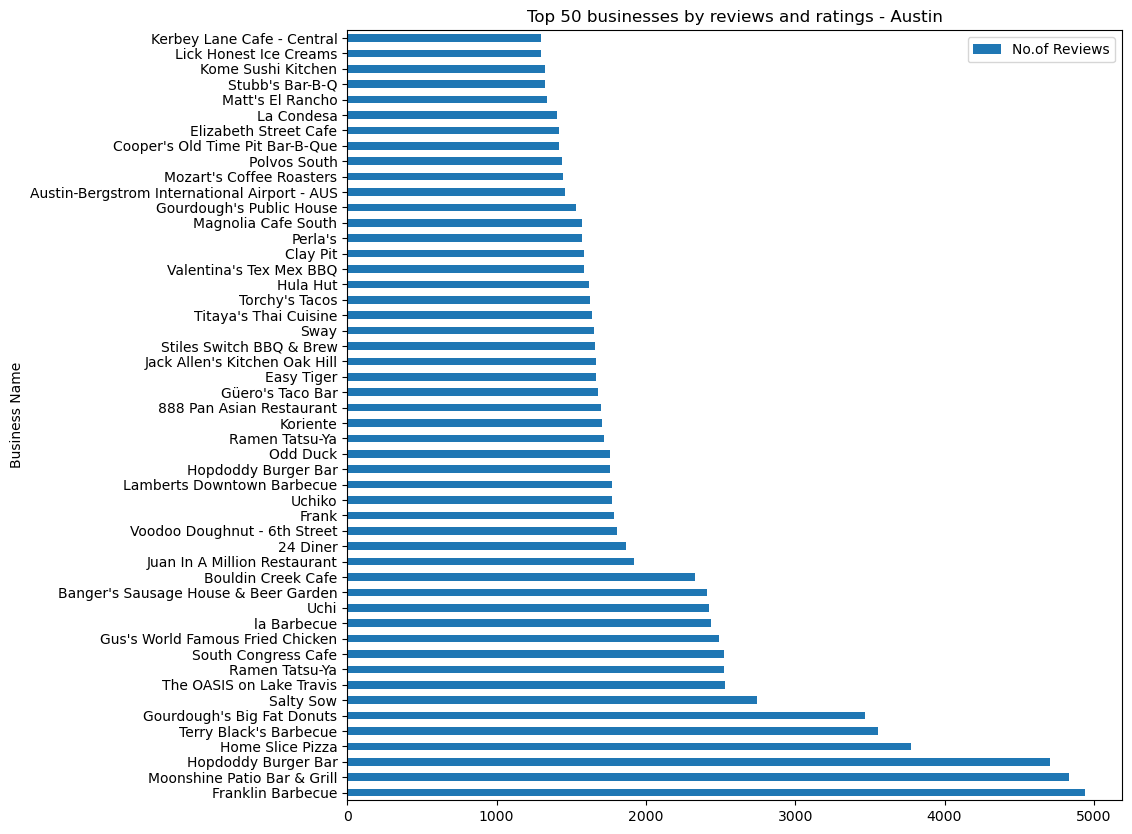

In [380]:
business_name_review_ratings_pd[:50].plot(kind='barh', x='Business Name',y='No.of Reviews', stacked=False, figsize=[10,10])
plt.title('Top 50 businesses by reviews and ratings - Austin')
plt.show()

In [359]:
business_name_review_ratings_pd = business_name_review_ratings_pd.sort_values(ascending=False, by = ['No.of Reviews','Ratings'])
business_name_review_ratings_pd.head()

,Business Name,No.of Reviews,Ratings
4910,Franklin Barbecue,4942,4.5
2611,Moonshine Patio Bar & Grill,4833,4.5
171,Hopdoddy Burger Bar,4708,4.0
6496,Home Slice Pizza,3776,4.5
501,Terry Black's Barbecue,3555,4.5


### Find number of unique cities explored by user+friends

In [17]:
# friends city exploration
user_friends_mapping = defaultdict(set)
f = './yelp_dataset/yelp_academic_dataset_user.json'
for l in tqdm(parseData(f)):
    if l!=null and len(l['friends'])>0:
        for friend in l['friends'].split(','):
                user_friends_mapping[l['user_id']].add(friend)

2189457it [12:59, 2807.88it/s] 


In [ ]:
len(user_friends_mapping)

In [ ]:
businessPerUser = defaultdict(set)
f = './yelp_dataset/yelp_academic_dataset_review.json'
for l in tqdm(parseData(f)):
     if l!=null:
            businessPerUser[l['user_id']].add(l['business_id'])

In [ ]:
business_city_map = defaultdict()
f = './yelp_dataset/yelp_academic_dataset_business.json'
for l in tqdm(parseData(f)):
    if l!=null:
        business_city_map[l['business_id']] = l['city']

In [ ]:
user_city_span = defaultdictdict(set)
for user in businessPerUser:
    for business in businessPerUser[user]:
        user_city_span[user].add(business_city_map[business])

In [ ]:
user_friend_city_count = defaultdict(int)
sum_city_per_user = 0
for user in user_friends_mapping:
    unique_cities = user_city_span[user]
    for friend in user_friends_mapping[user]:
        if friend in user_city_span:
            unique_cities.union(user_city_span[friend])
    user_friend_city_count[user] = len(unique_cities)
    sum_city_per_user+=len(unique_cities)

In [ ]:
avg_city_per_user = sum_city_per_user/len(user_friend_city_count)
print(avg_city_per_user)